# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame using merge
combined_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the combined DataFrame to verify
combined_data.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [43]:
# Checking the number of mice.
mouse_count = combined_data["Mouse ID"].nunique()
mouse_count

249

In [44]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# duplicate_id = combined_data["Mouse ID"].duplicated()
# duplicate_id

# Identify duplicate mice based on Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Extract the Mouse IDs with duplicates
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Display the duplicate mice
print("Duplicate Mouse IDs:")
duplicate_mouse_ids

Duplicate Mouse IDs:


array(['g989'], dtype=object)

In [45]:
# Optional: Get all the data for the duplicate mouse ID. 
# Identify duplicate mice based on Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Filter combined_data for the duplicate Mouse IDs
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice['Mouse ID'])]

# Display all data for the duplicate Mouse IDs
print("Data for Duplicate Mouse IDs:")
duplicate_mouse_data.sort_values(by=['Mouse ID', 'Timepoint'])

Data for Duplicate Mouse IDs:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID

new_combined_data = combined_data[combined_data['Mouse ID'] !="g989" ]
new_combined_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [47]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = new_combined_data["Mouse ID"].nunique()
new_mouse_count

248

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = new_combined_data.groupby(['Drug Regimen'], as_index=True).agg(
                      {'Tumor Volume (mm3)':['mean','median','var','std','sem']})

# .rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [49]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [50]:
# VAlues of Mouse ID per timepoint
count_perDregimen = new_combined_data.value_counts('Drug Regimen')
count_perDregimen


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: count, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

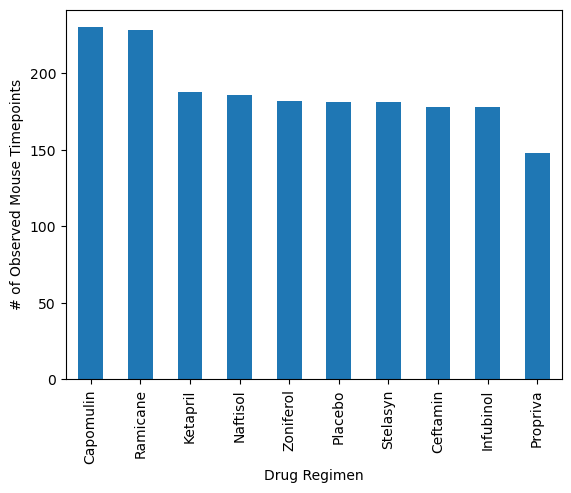

In [51]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Barplot = count_perDregimen. plot. bar()
Barplot.set_ylabel("# of Observed Mouse Timepoints")

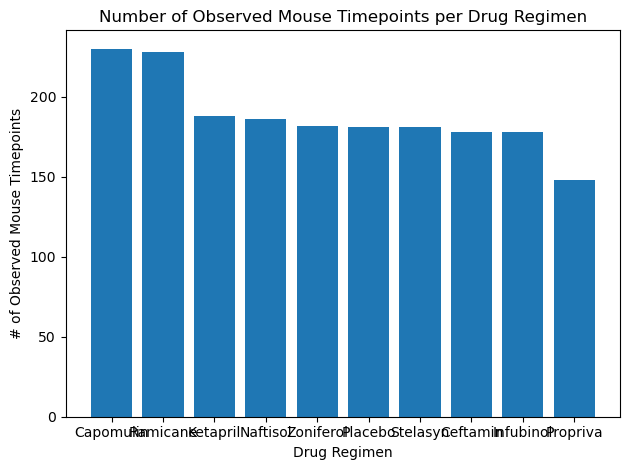

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


plt.bar(count_perDregimen.index, count_perDregimen.values)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Number of Observed Mouse Timepoints per Drug Regimen')
plt.tight_layout()

plt.show()




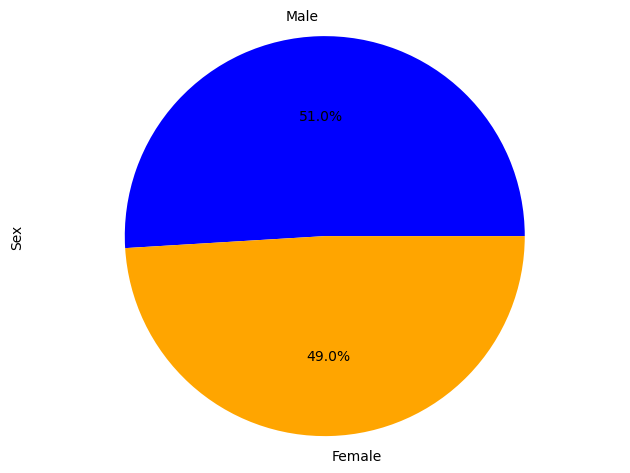

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_percentages = new_combined_data['Sex'].value_counts()*100
sex_percentages.plot(kind= 'pie', autopct='%1.1f%%', colors=['blue','orange'])
#Display the plot 
plt.ylabel('Sex')
plt.axis('equal')
plt.tight_layout()
plt.show()

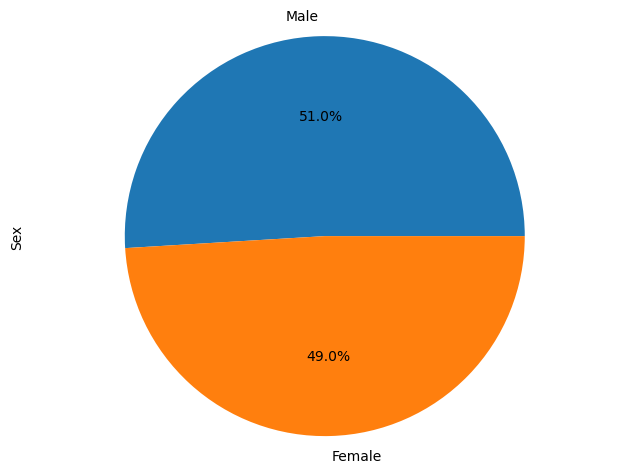

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_percentages = new_combined_data['Sex'].value_counts() * 100
colors = ['blue', 'orange']
plt.pie(sex_percentages, labels=sex_percentages.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.axis('equal')  
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = new_combined_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_timepoint, new_combined_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the first few rows to verify the merge
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [56]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
potential_outliers = {}

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_data[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Calculate the IQR and determine the bounds
    Q1 = treatment_data.quantile(0.25)
    Q3 = treatment_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Determine outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    potential_outliers[treatment] = outliers

for treatment in treatments:
    print(f"{treatment}'s potential outliers: {potential_outliers[treatment]}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


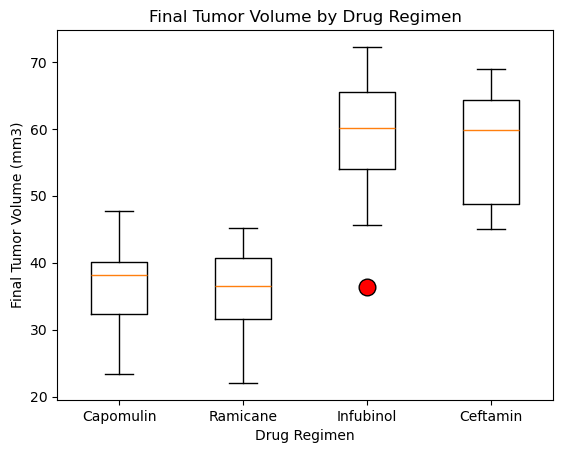

In [57]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volumes = []

for treatment in treatments:
    treatment_data = merged_data[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_volumes.append(treatment_data)

# Create the box plot
fig, ax = plt.subplots()

# Creating boxplot
ax.boxplot(tumor_volumes, labels=treatments, flierprops=dict(marker='o', color='red', markerfacecolor='red', markersize=12))

# Adding titles and labels
ax.set_title('Final Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

# Display the plot
plt.show()

## Line and Scatter Plots

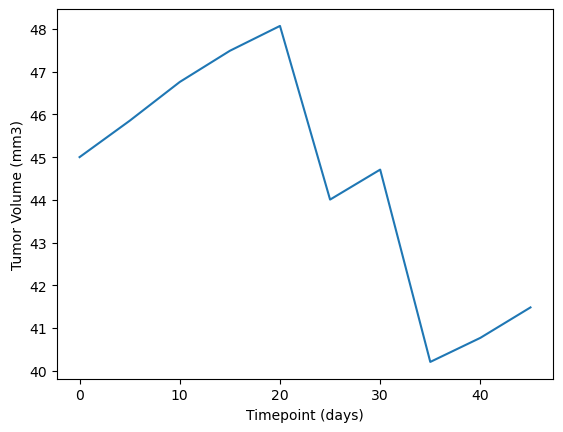

In [58]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
value_counts = new_combined_data.loc[new_combined_data['Mouse ID']=='l509'] 
z_counts = value_counts.loc[value_counts['Drug Regimen']=='Capomulin']
plt.plot(z_counts['Timepoint'], z_counts['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

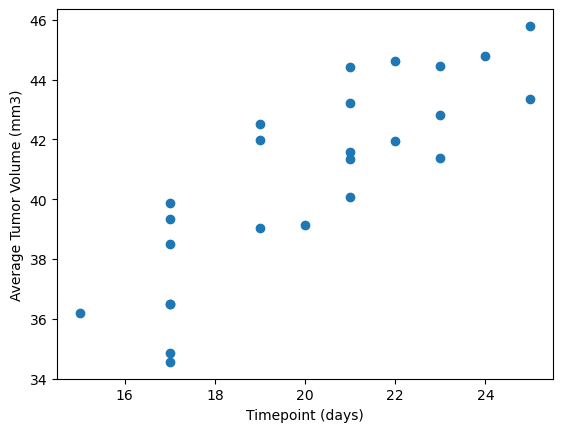

In [59]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
m_counts = new_combined_data.loc[new_combined_data['Drug Regimen']=='Capomulin'].groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(m_counts['Weight (g)'], m_counts['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

0.8419363424694721


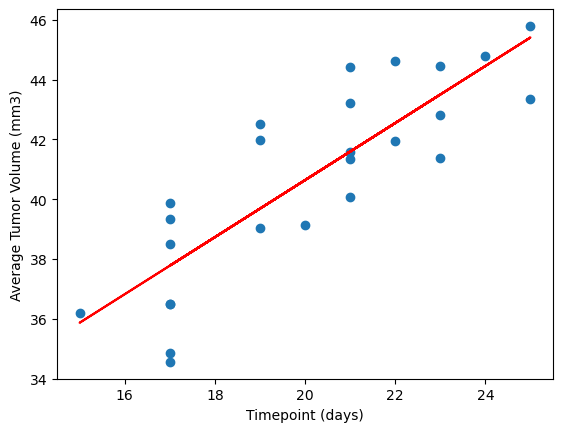

In [60]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
res = st.linregress(m_counts['Weight (g)'], m_counts['Tumor Volume (mm3)'])
plt.plot(m_counts['Weight (g)'], res.intercept + res.slope*m_counts['Weight (g)'], 'r')


r_counts = st.pearsonr(m_counts['Weight (g)'], m_counts['Tumor Volume (mm3)'])

print(r_counts[0])

plt.scatter(m_counts['Weight (g)'], m_counts['Tumor Volume (mm3)'])


plt.xlabel('Timepoint (days)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()